<a href="https://colab.research.google.com/github/M-luthra07/deep-learning/blob/main/01_COLAB_Perceptron_to_Convert_C_to_F-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:

Temperature_df = pd.read_csv('https://raw.githubusercontent.com/M-luthra07/deep-learning/main/02_Celsius%20to%20Fahrenheit-1.csv')
Temperature_df.reset_index(drop=True, inplace=True)

In [5]:
Temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [8]:
Temperature_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [9]:
Temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [10]:
Temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [ ]:
Temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

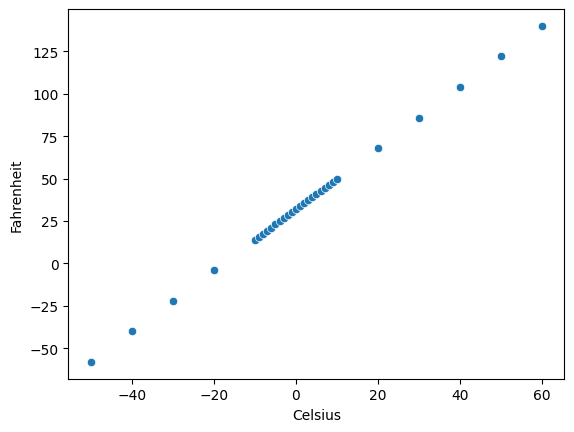

In [8]:
sns.scatterplot(x='Celsius', y='Fahrenheit', data=Temperature_df)

# STEP#4: BUILD AND TRAIN THE MODEL

In [10]:
from sklearn.model_selection import train_test_split

celsius = Temperature_df['Celsius']
fahrenheit = Temperature_df['Fahrenheit']
X_train, X_test, y_train, y_test = train_test_split(celsius, fahrenheit, test_size=0.2, random_state=42)


This will model a simple linear equation.

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [18]:
epochs_hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step - loss: 1.3193 - mae: 1.1486
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.3160 - mae: 1.1468
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.3137 - mae: 1.1452
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.3118 - mae: 1.1439
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.3095 - mae: 1.1429
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.3070 - mae: 1.1420
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.3045 - mae: 1.1413
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.3022 - mae: 1.1406
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.3000 - mae: 1.1398
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.2978 - mae: 1.1390
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.2956 - mae: 1.1380
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.2932 - mae: 1.1370
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/st

In [19]:
epochs_hist.history.keys()

dict_keys(['loss', 'mae'])

In [23]:
loss, mae= model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")



Test Loss: 1.0829, Test MAE: 1.0404


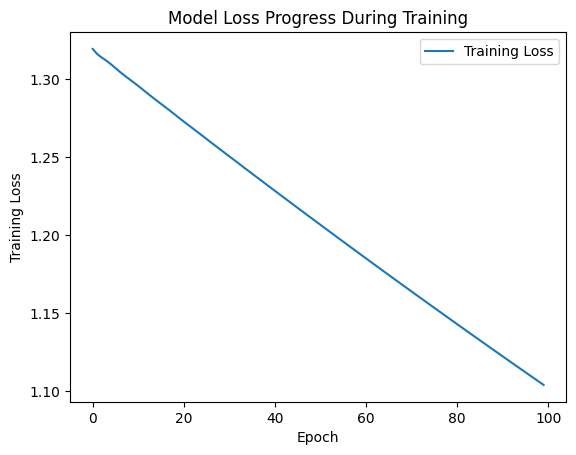

In [30]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
model.get_weights()

[array([[1.8139124]], dtype=float32), array([30.628922], dtype=float32)]

In [26]:
celsius_test_values = np.array([-40, 0, 100], dtype=float)
predicted_fahrenheit = model.predict(celsius_test_values)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [29]:
# Let's confirm this Using the equation:
Temp_F = 9/5 * Temp_C + 32
print('Temperature in degF Using Equation =', Temp_F)


Temperature in degF Using Equation = 32.0


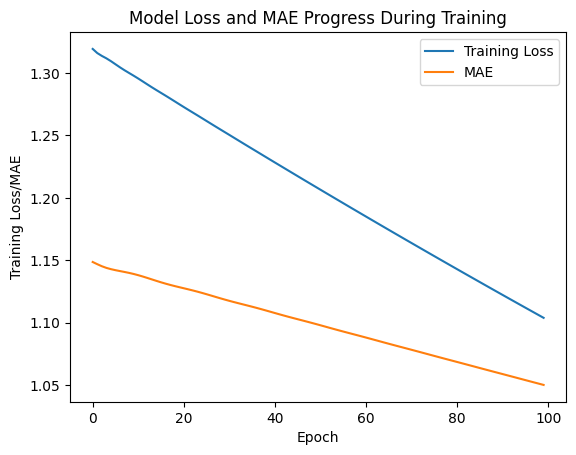

In [34]:


import matplotlib.pyplot as plt
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['mae'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss', 'MAE'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Confusion Matrix:
 [[0 0]
 [5 1]]
Accuracy: 0.1667
Recall: 0.1667
Precision: 1.0000


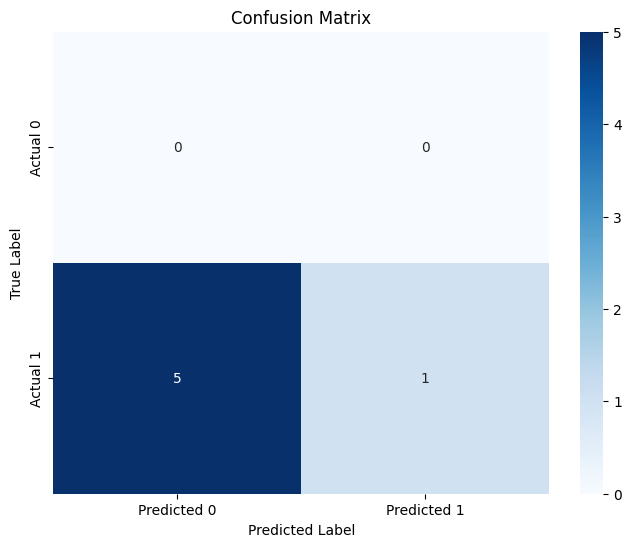

In [36]:
# prompt: confusion matrix and accuracy ,recall,precision

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score


y_pred = model.predict(X_test)

threshold = 1
y_pred_class = np.where(np.abs(y_pred - y_test.values.reshape(-1, 1)) <= threshold, 1, 0)
y_true = np.where(np.abs(y_test.values.reshape(-1,1) - y_test.values.reshape(-1, 1)) <= threshold, 1, 0) # Use y_test for the true values


cm = confusion_matrix(y_true, y_pred_class)
accuracy = accuracy_score(y_true, y_pred_class)
recall = recall_score(y_true, y_pred_class)
precision = precision_score(y_true, y_pred_class)


print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")


# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
